<h2 style="text-align: center;">Task Set 9</h2>
<h1 style="text-align: center;">R - ggplot2 package</h1>

#### Wczytanie potrzebnych pakietów

In [2]:
library(tidyverse)
library(ggplot2)
library(ggthemes)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Dołączanie pakietu: 'gridExtra'


Następujący obiekt został zakryty z 'package:dplyr':

    combine




## Zadanie 1

1. Zobacz jakie zmienne znajdują się w `df diamonds`  
   - Następnie wykonaj wykres rozrzutu: na osi X umieść `carat`, na osi Y `price`.  
   - Dodatkowo dopasuj do danych krzywą obrazującą przebieg danych.

2. Zmodyfikuj wykres z poprzedniego podpunktu  
   - Dodaj atrybut `clarity` jako kolor do wykresu  
   - Zmień punkty na półprzezroczyste o wielkości 3 pikseli.

3. Wykonaj wykres pokazany poniżej:  
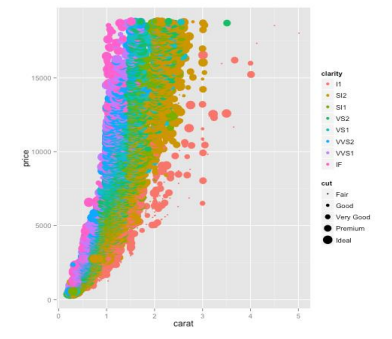

4. Wykonaj wykres punktowy danych `diamonds`  
   - Na osi X `carat`, na osi Y `price`  
   - Ustaw punkty jako półprzezroczyste oraz osie na skali logarytmicznej.

5. Wykonaj wykres kolumnowy dla atrybutu `cut`  
   - Jako wypełnienie kolorem (`fill`) ustaw atrybut `clarity`.  
   - Wykonaj wykres w dwóch pozycjach: **standardowej** oraz **dodge**.


`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


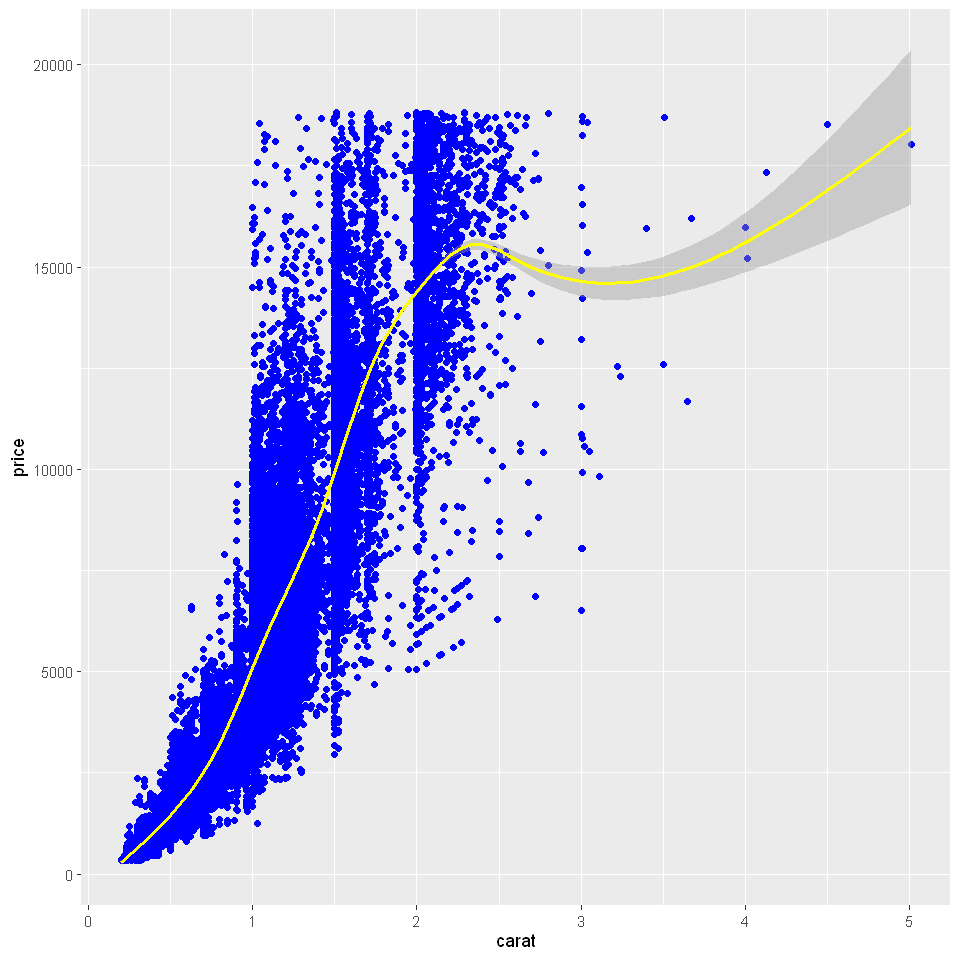

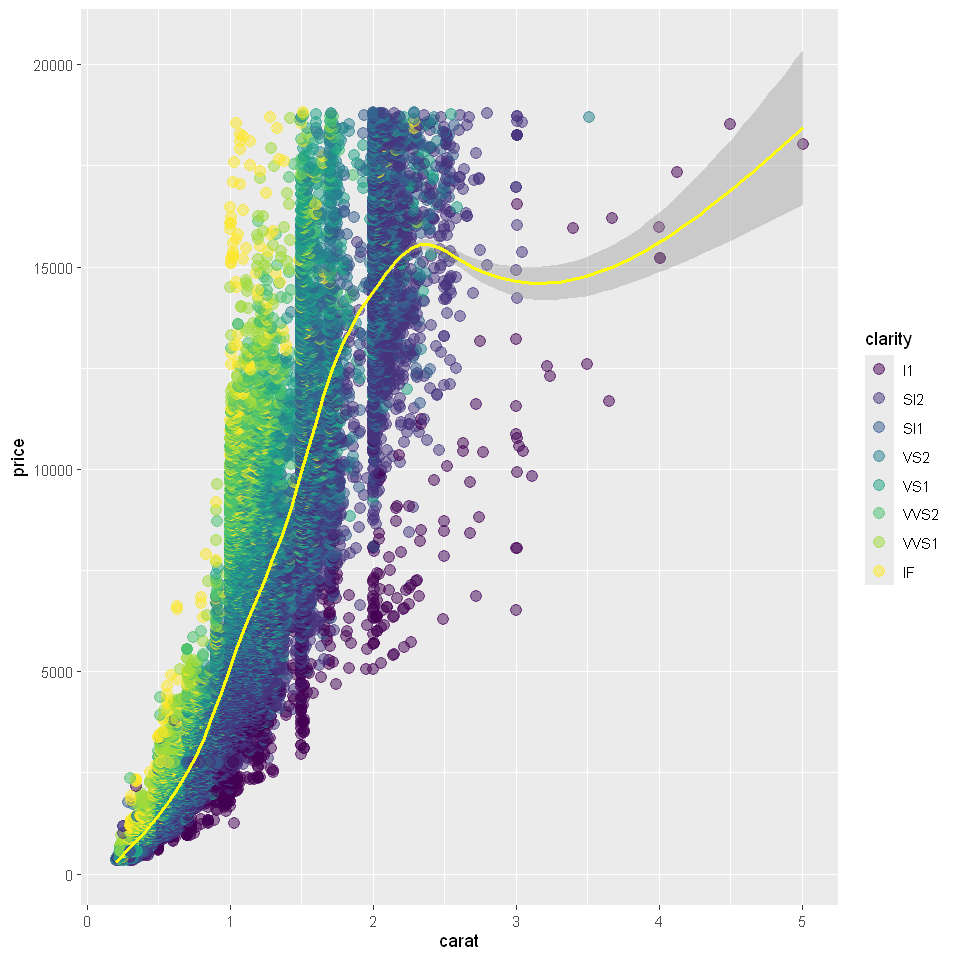

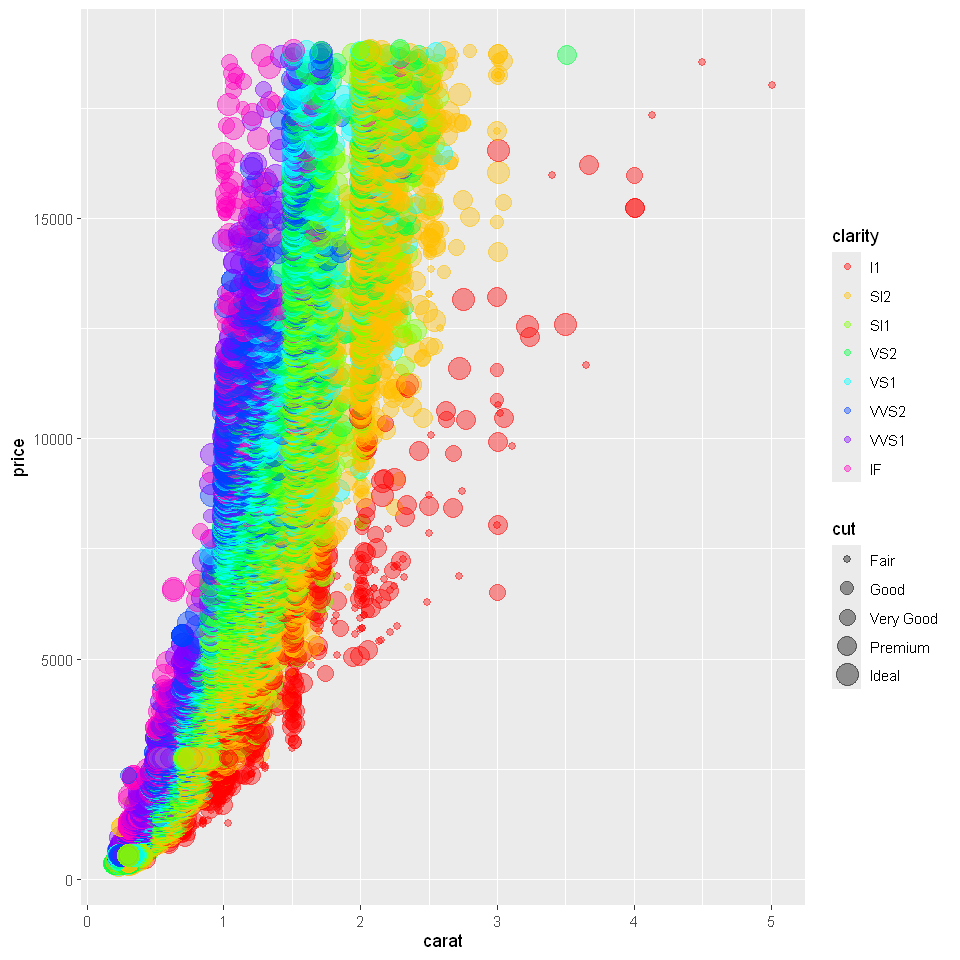

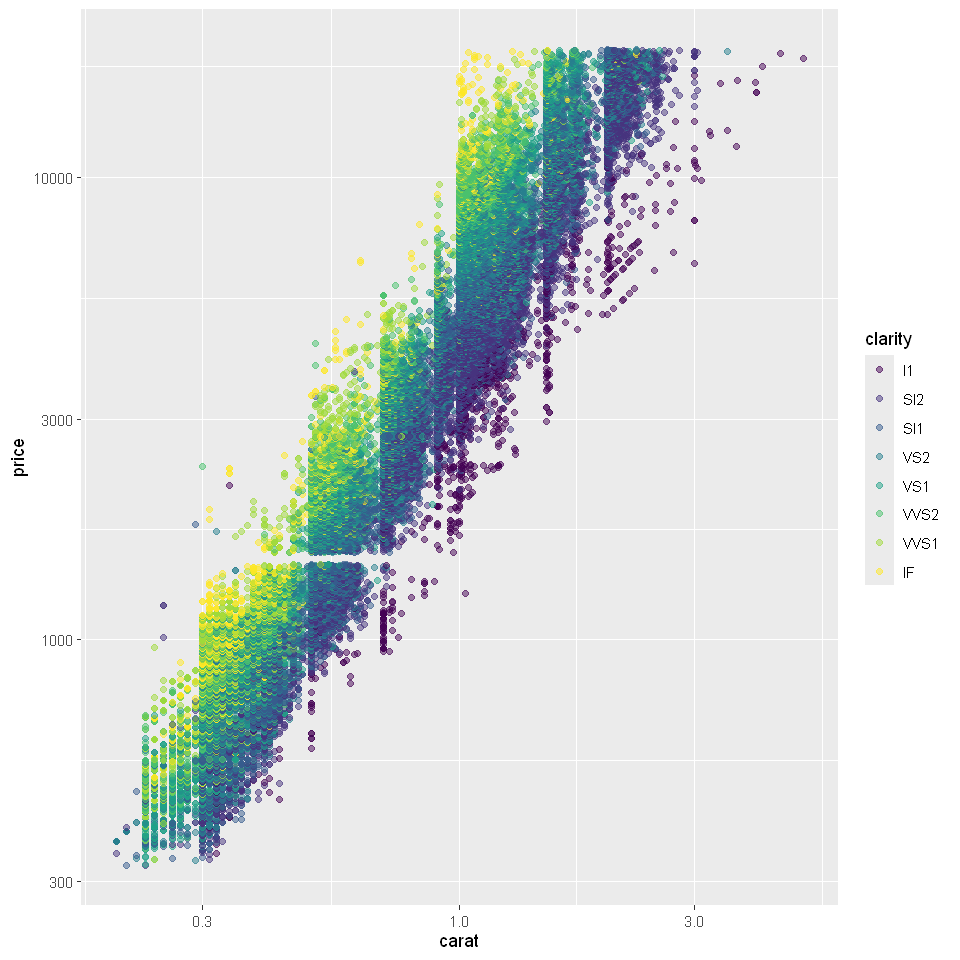

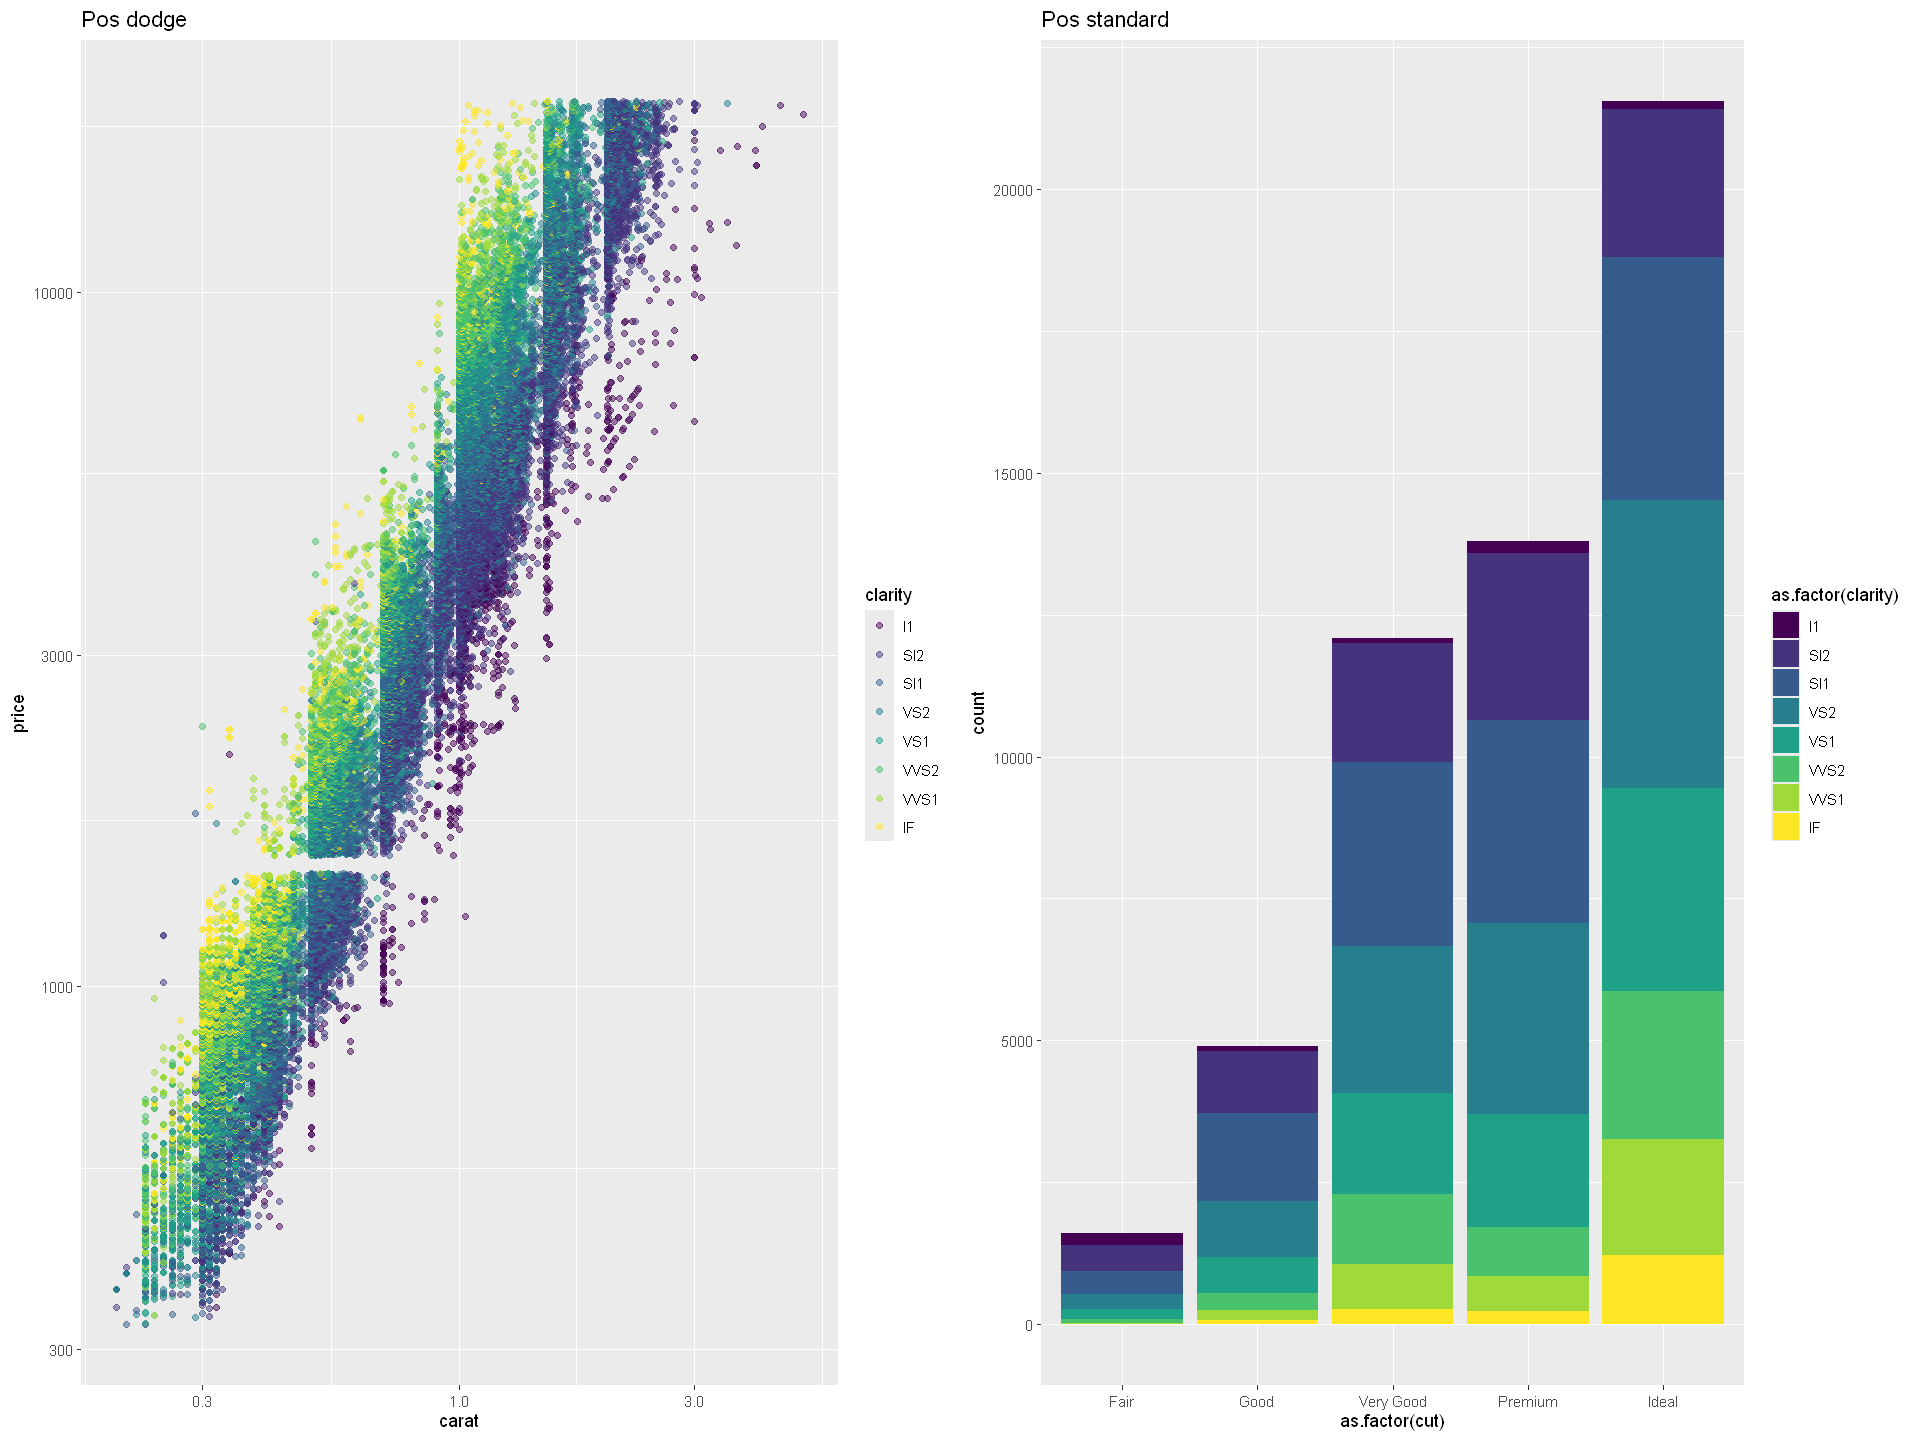

In [3]:
options(repr.plot.width = 8, repr.plot.height = 8) # Ustawienie szerokości okna wykresu

# 1. Wykres rozrzutu z dodaną linią trendu
ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point(color = "blue") +  # Dodanie punktów w kolorze niebieskim
  geom_smooth(color = "yellow") # Dodanie żółtej linii trendu

# 2. Wykres rozrzutu z różnymi kolorami w zależności od zmiennej `clarity`
ggplot(diamonds, aes(x = carat, y = price, color = clarity)) +
  geom_point(alpha = 0.5, size = 3) + # Półprzezroczyste punkty o rozmiarze 3
  geom_smooth(color = "yellow") # Żółta linia trendu na wykresie

# 3. Wykres z dodaną skalą kolorów według zmiennej `clarity` i wielkości według zmiennej `cut`
ggplot(diamonds, aes(x = carat, y = price, color = clarity, size = cut)) +
  geom_point(alpha = 0.4) + # Półprzezroczyste punkty
  scale_colour_manual(values = rainbow(8)) # Manualne przypisanie kolorów z palety tęczy

# 4. Wykres logarytmiczny dla obu osi
ggplot(diamonds, aes(x = carat, y = price, color = clarity)) +
  geom_point(alpha = 0.5) +  # Półprzezroczyste punkty
  scale_x_log10() +          # Skala logarytmiczna osi X
  scale_y_log10()            # Skala logarytmiczna osi Y

# 5. Wyświetlenie wykresów obok siebie z tytułami
plot1 <- ggplot(diamonds, aes(x = carat, y = price, color = clarity)) +
  geom_point(alpha = 0.5) +
  scale_x_log10() +
  scale_y_log10() +
  labs(title = "Pos dodge")  # Tytuł wykresu pierwszego

plot2 <- ggplot(diamonds, aes(x = as.factor(cut), fill = as.factor(clarity))) +
  geom_bar() +
  labs(title = "Pos standard") # Tytuł wykresu drugiego

options(repr.plot.width = 16, repr.plot.height = 12) # Zmiana rozmiarów okna wykresu dla lepszej widoczności

# Wyświetlenie obu wykresów obok siebie w jednym oknie
grid.arrange(plot1, plot2, ncol = 2)


## Zadanie 2

1. Wykonaj wykres odpowiadający wzorowi:   
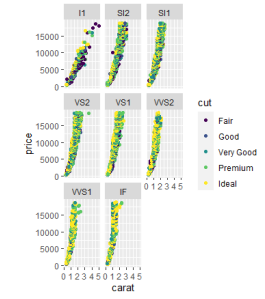

2. Wykonaj wykres rozrzutu danych `diamonds`. Na osi X umieść atrybut `carat`, na osi Y `price`, dodaj tytuł „Diamonds scatterplot” i tytuł osi x „Weight carats”.

3. Wykonaj macierzowe histogramy atrybutu `price` dla `diamonds`. Ustaw szerokość przedziałów na 200. Zmienna grupująca `clarity`.

4. Wykonaj wykres odpowiadający wzorowi poniżej (geom_density):

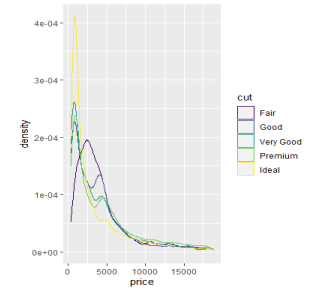

5. Wykonaj wykres ramka wąsy (boxplot) dla atrybutu na osi X `color`, Y `price` dla danych `diamonds`. Oś Y- logarytmiczna.

6. Zapisz wykres rozrzutu `carat` (os X), `price` (os Y) do zmiennej `m_plot`. Następnie zapisz do plików `wp_plot.png` oraz `mj_plot.jpeg`.

7. Wykonaj wykres `cut` (os X), `clarity` (os Y) z dodanym szumem do punktów (geom_jitter), ustaw przeźroczystość punktów na 0.03.


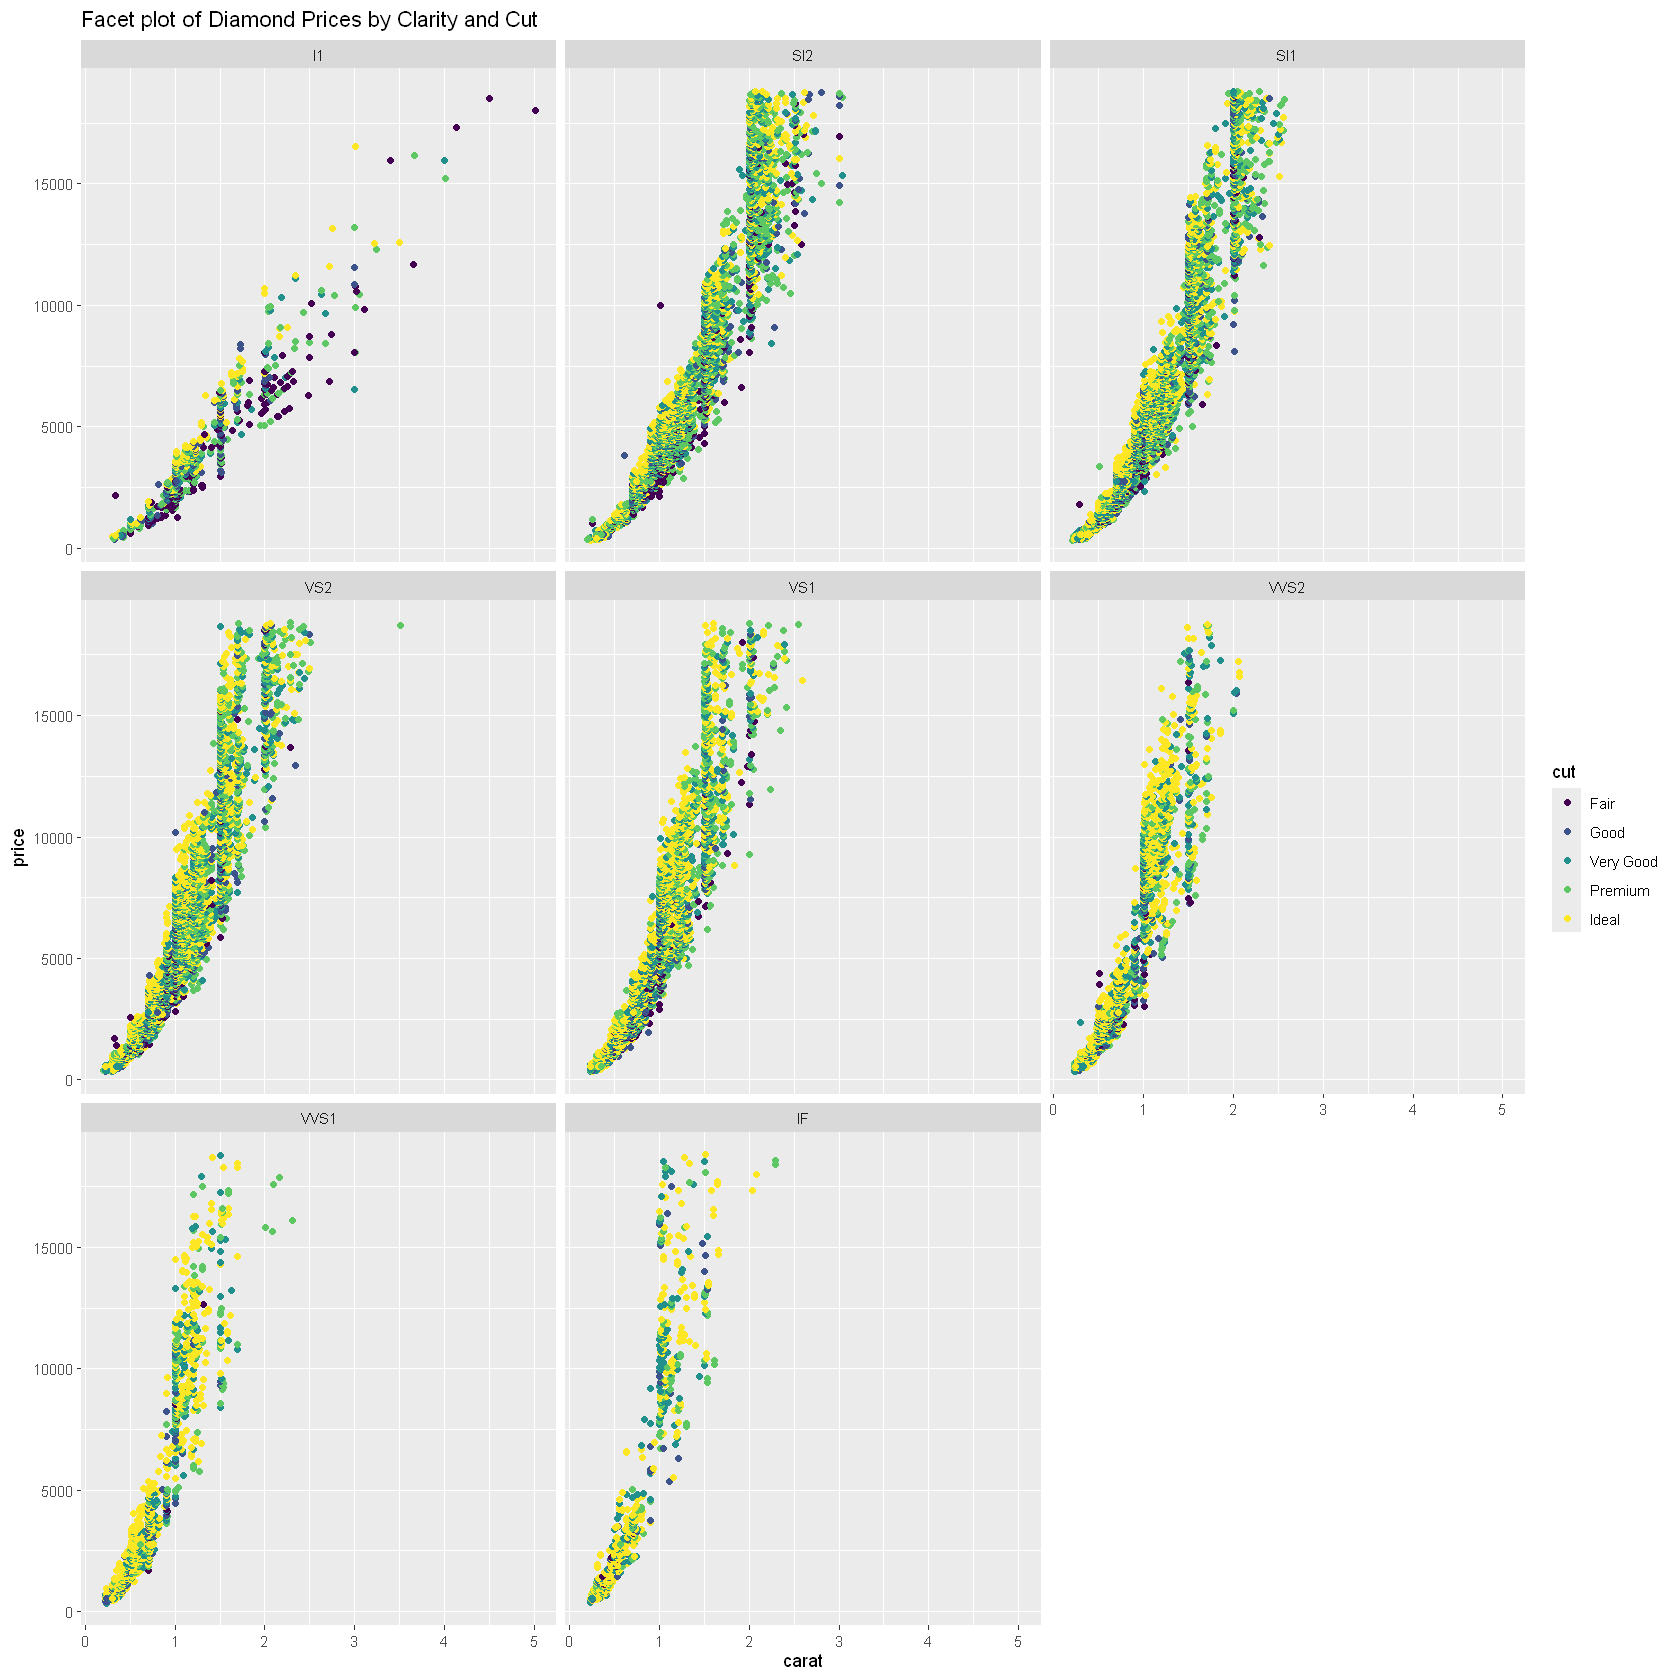

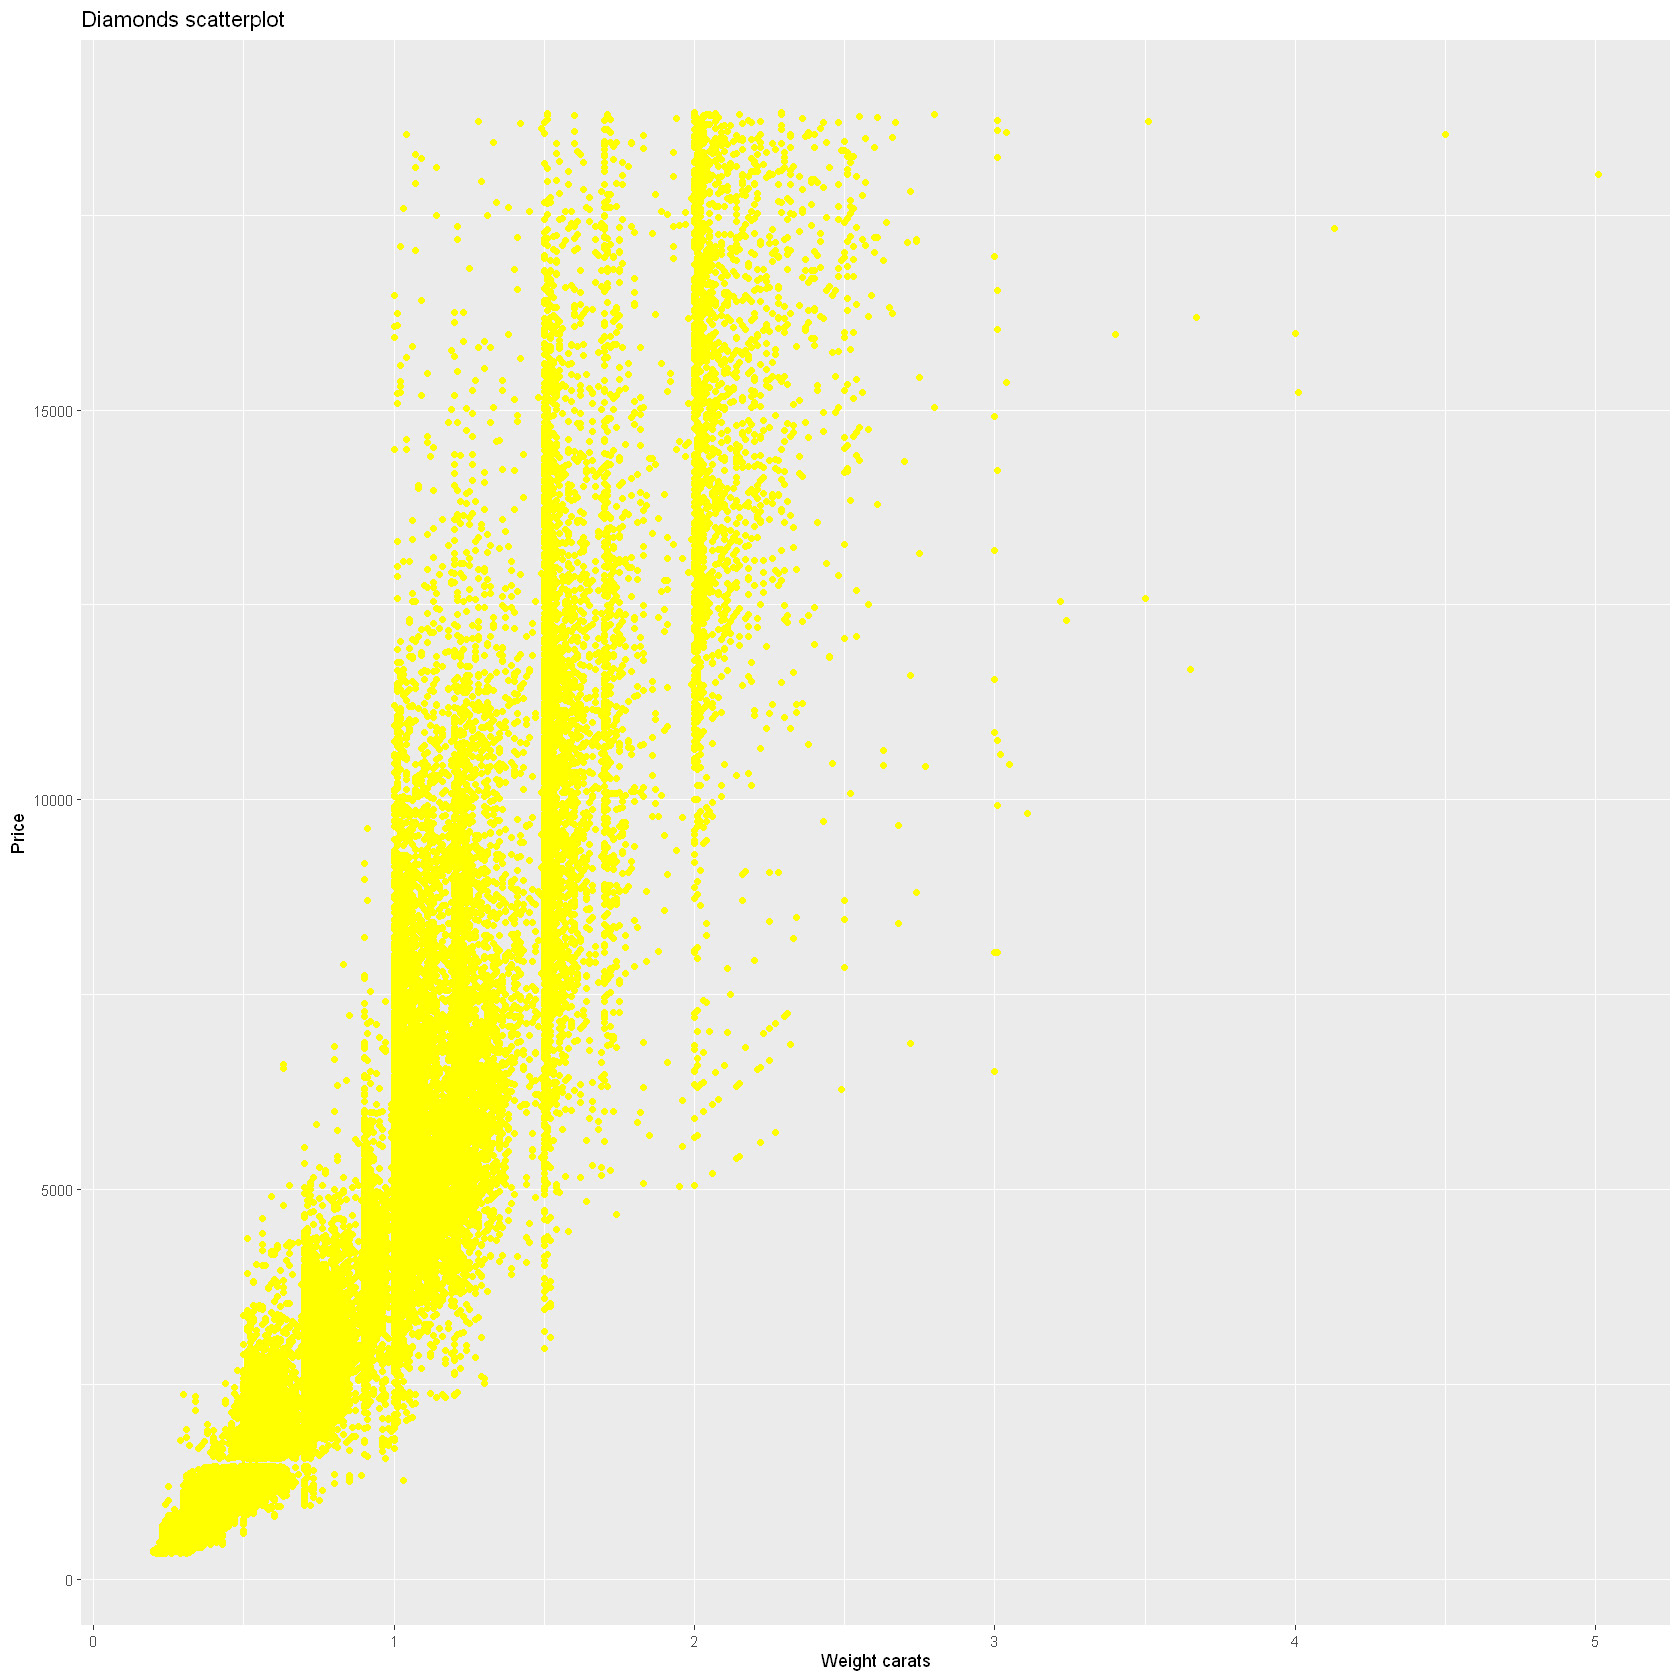

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


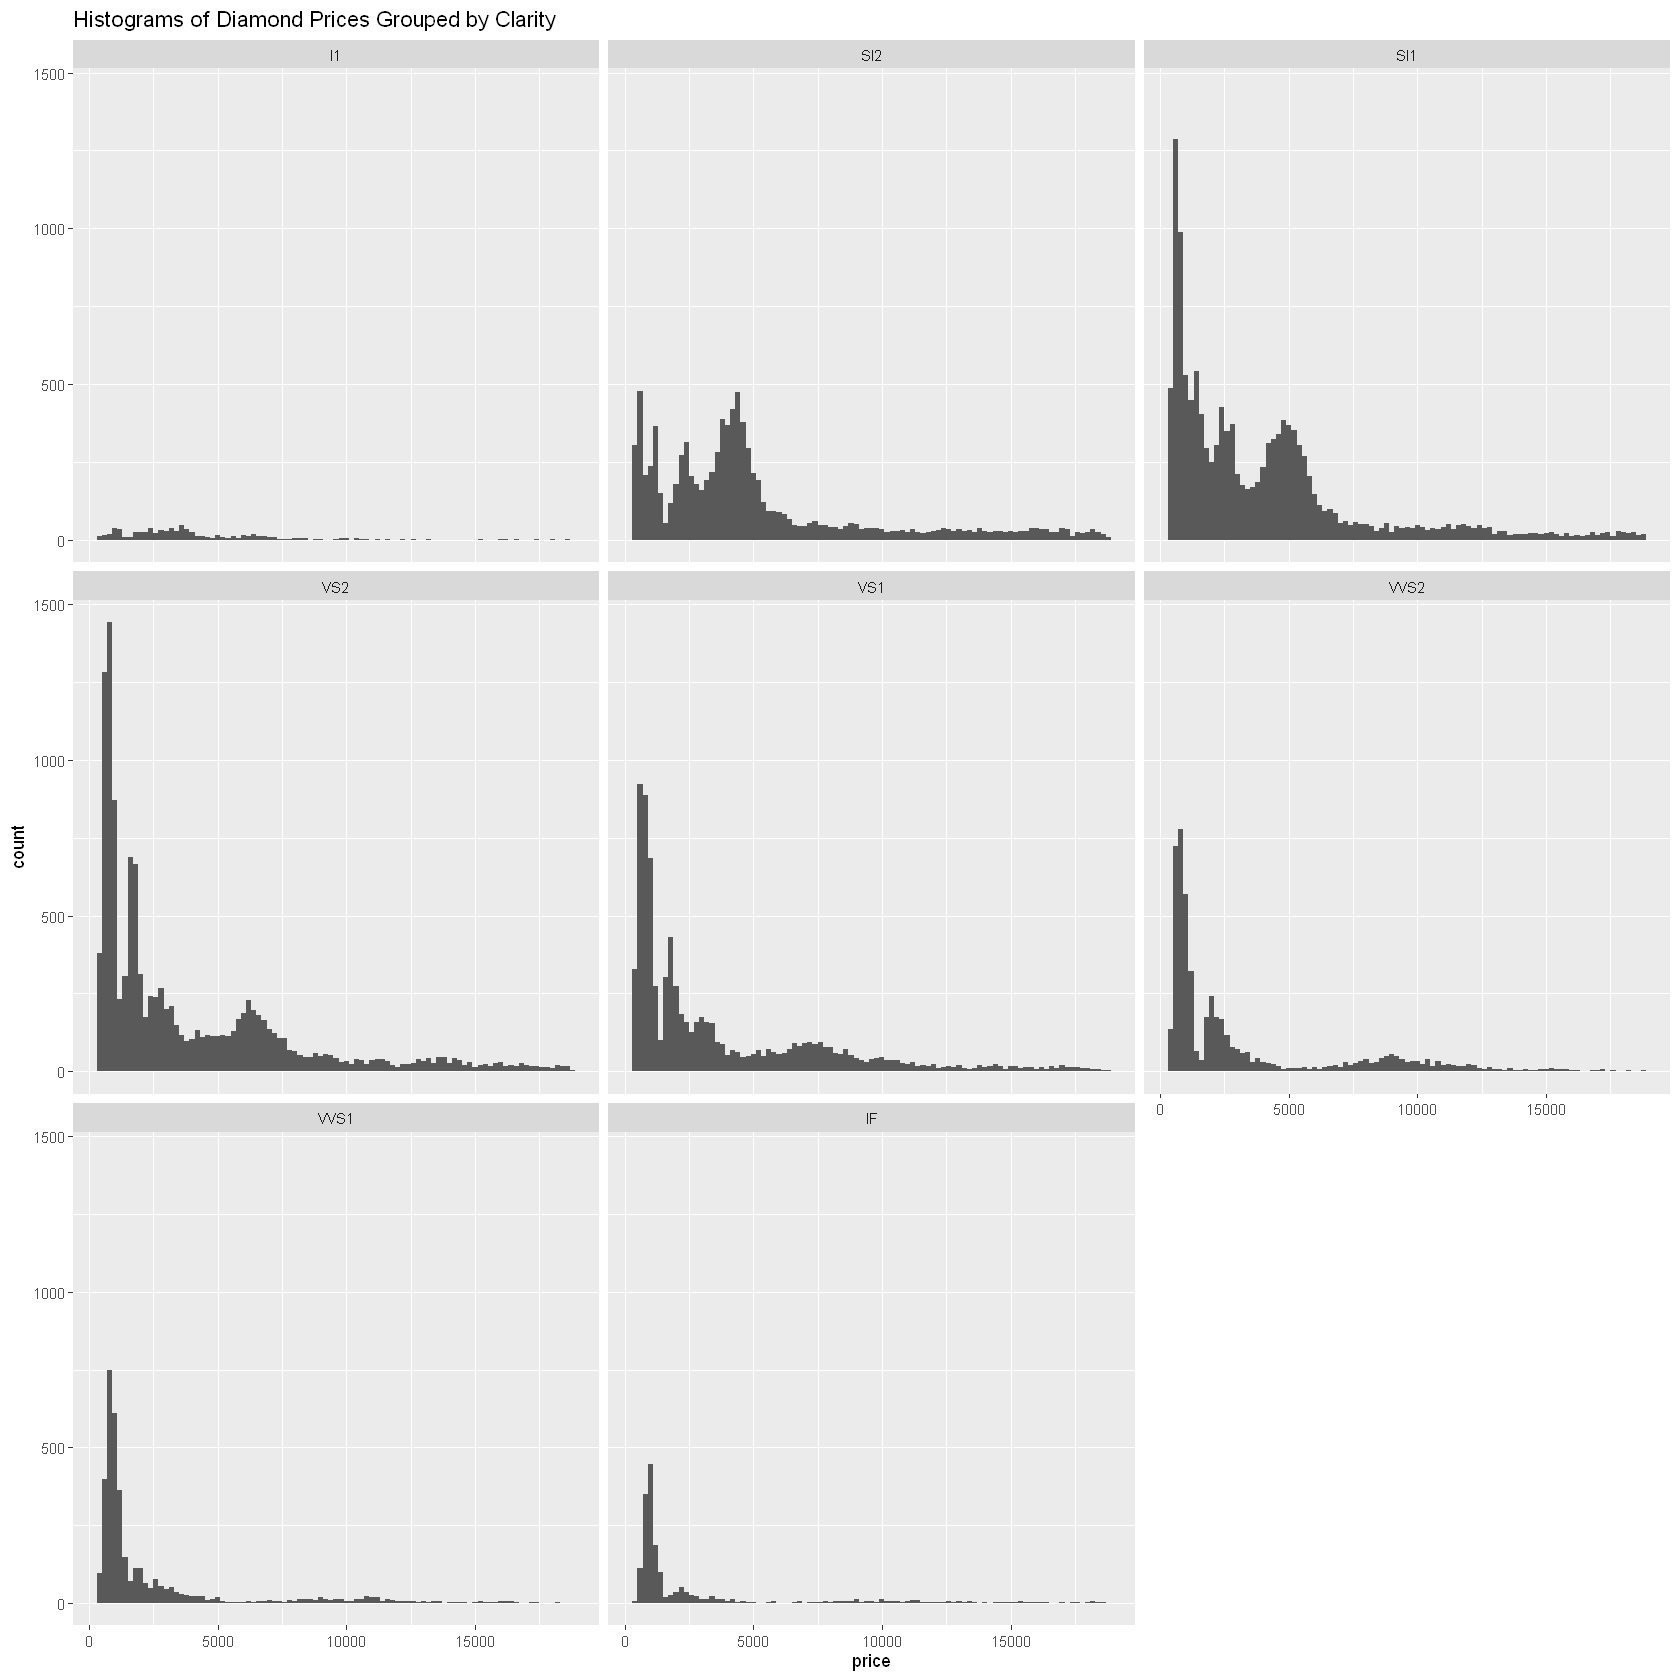

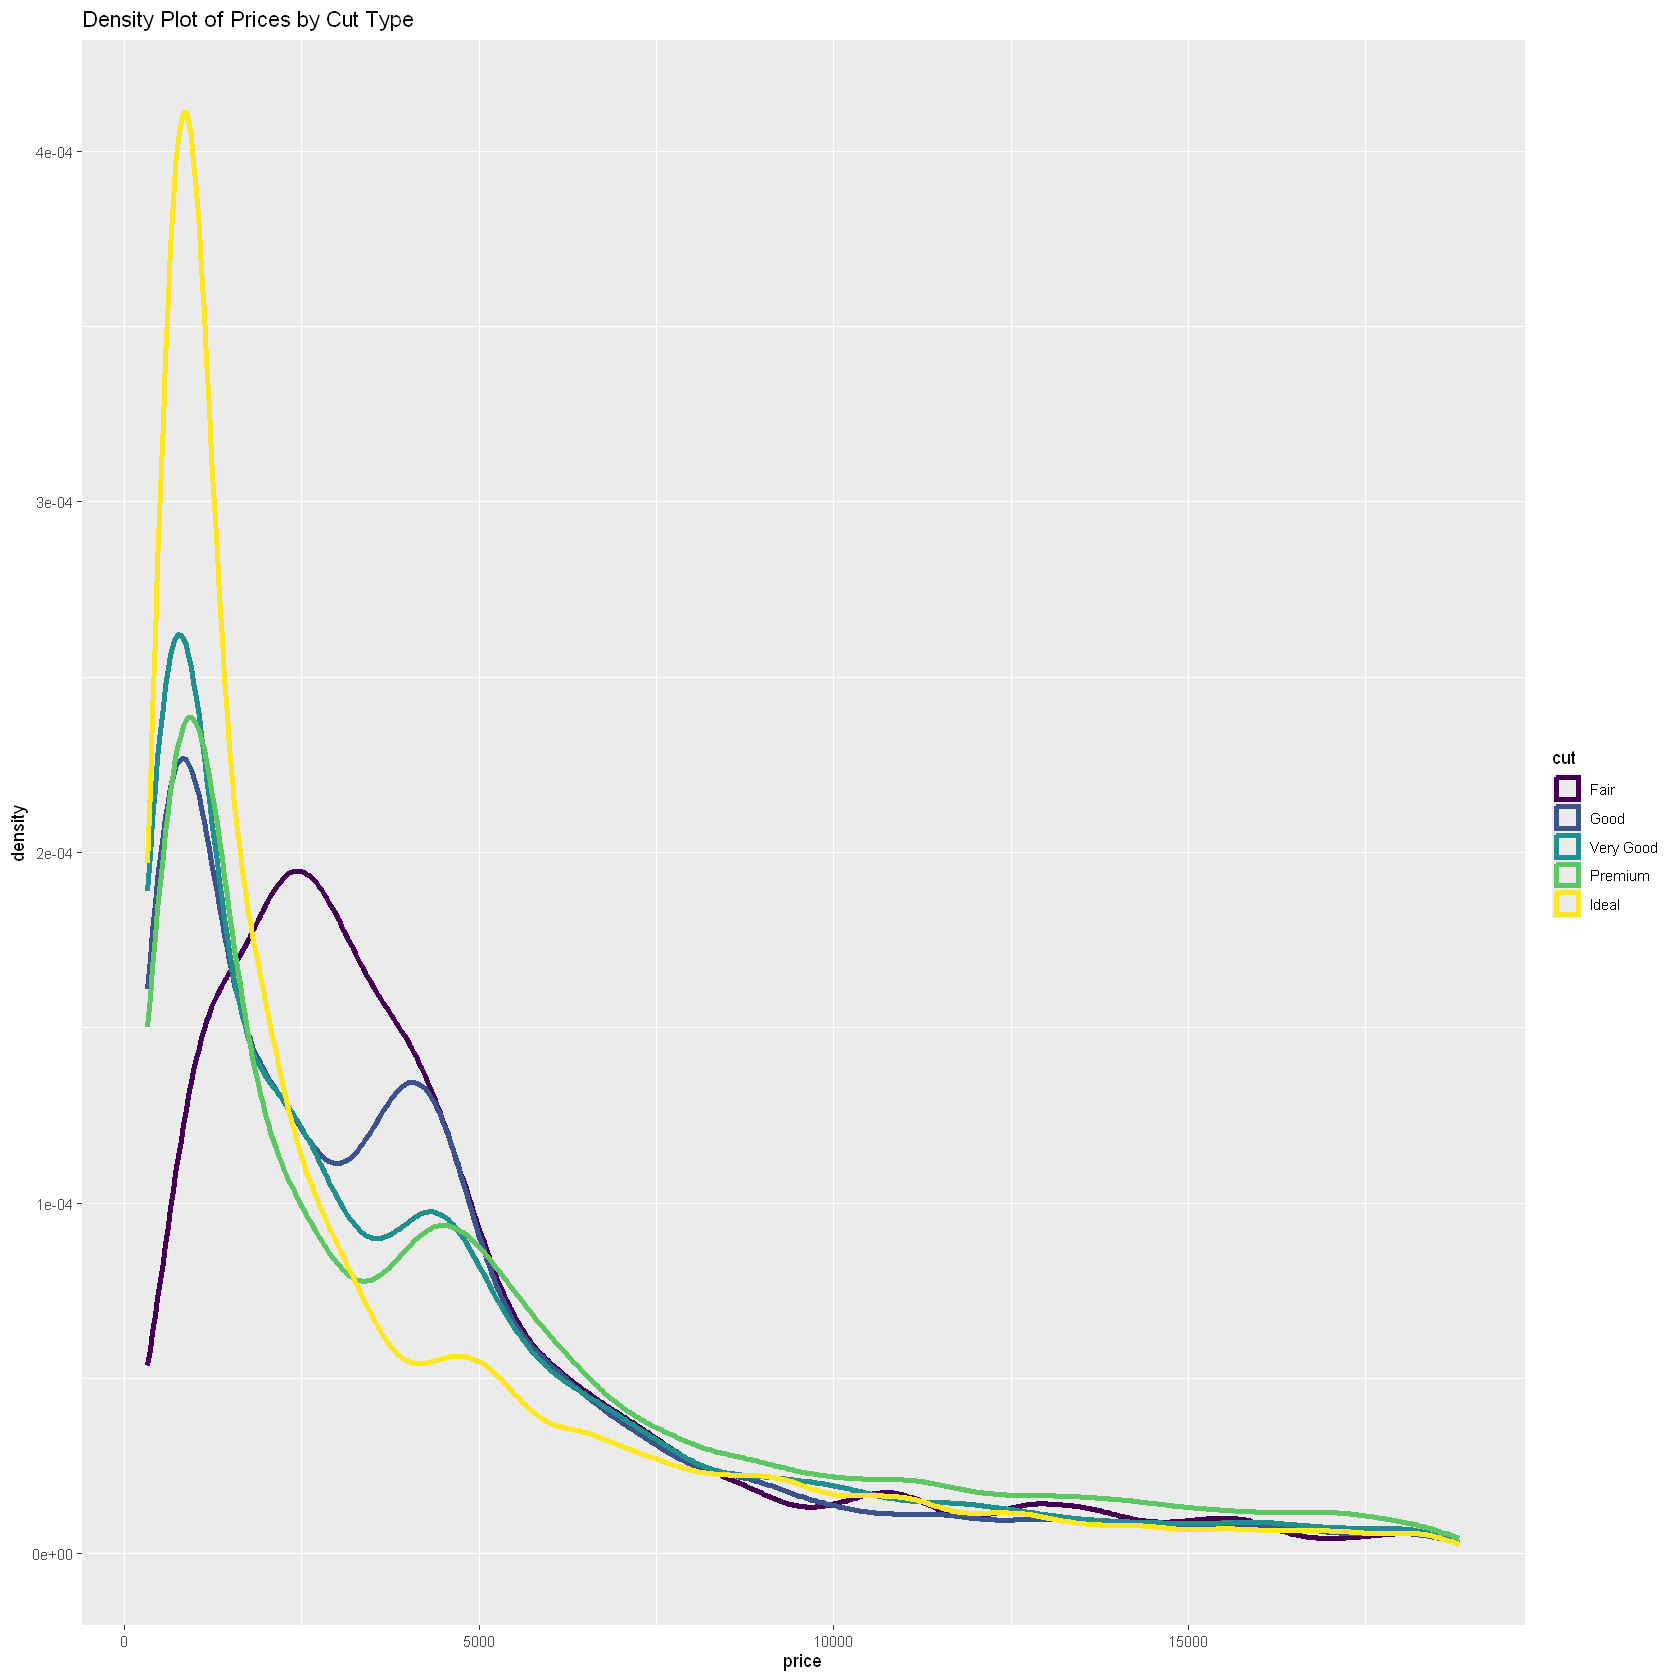

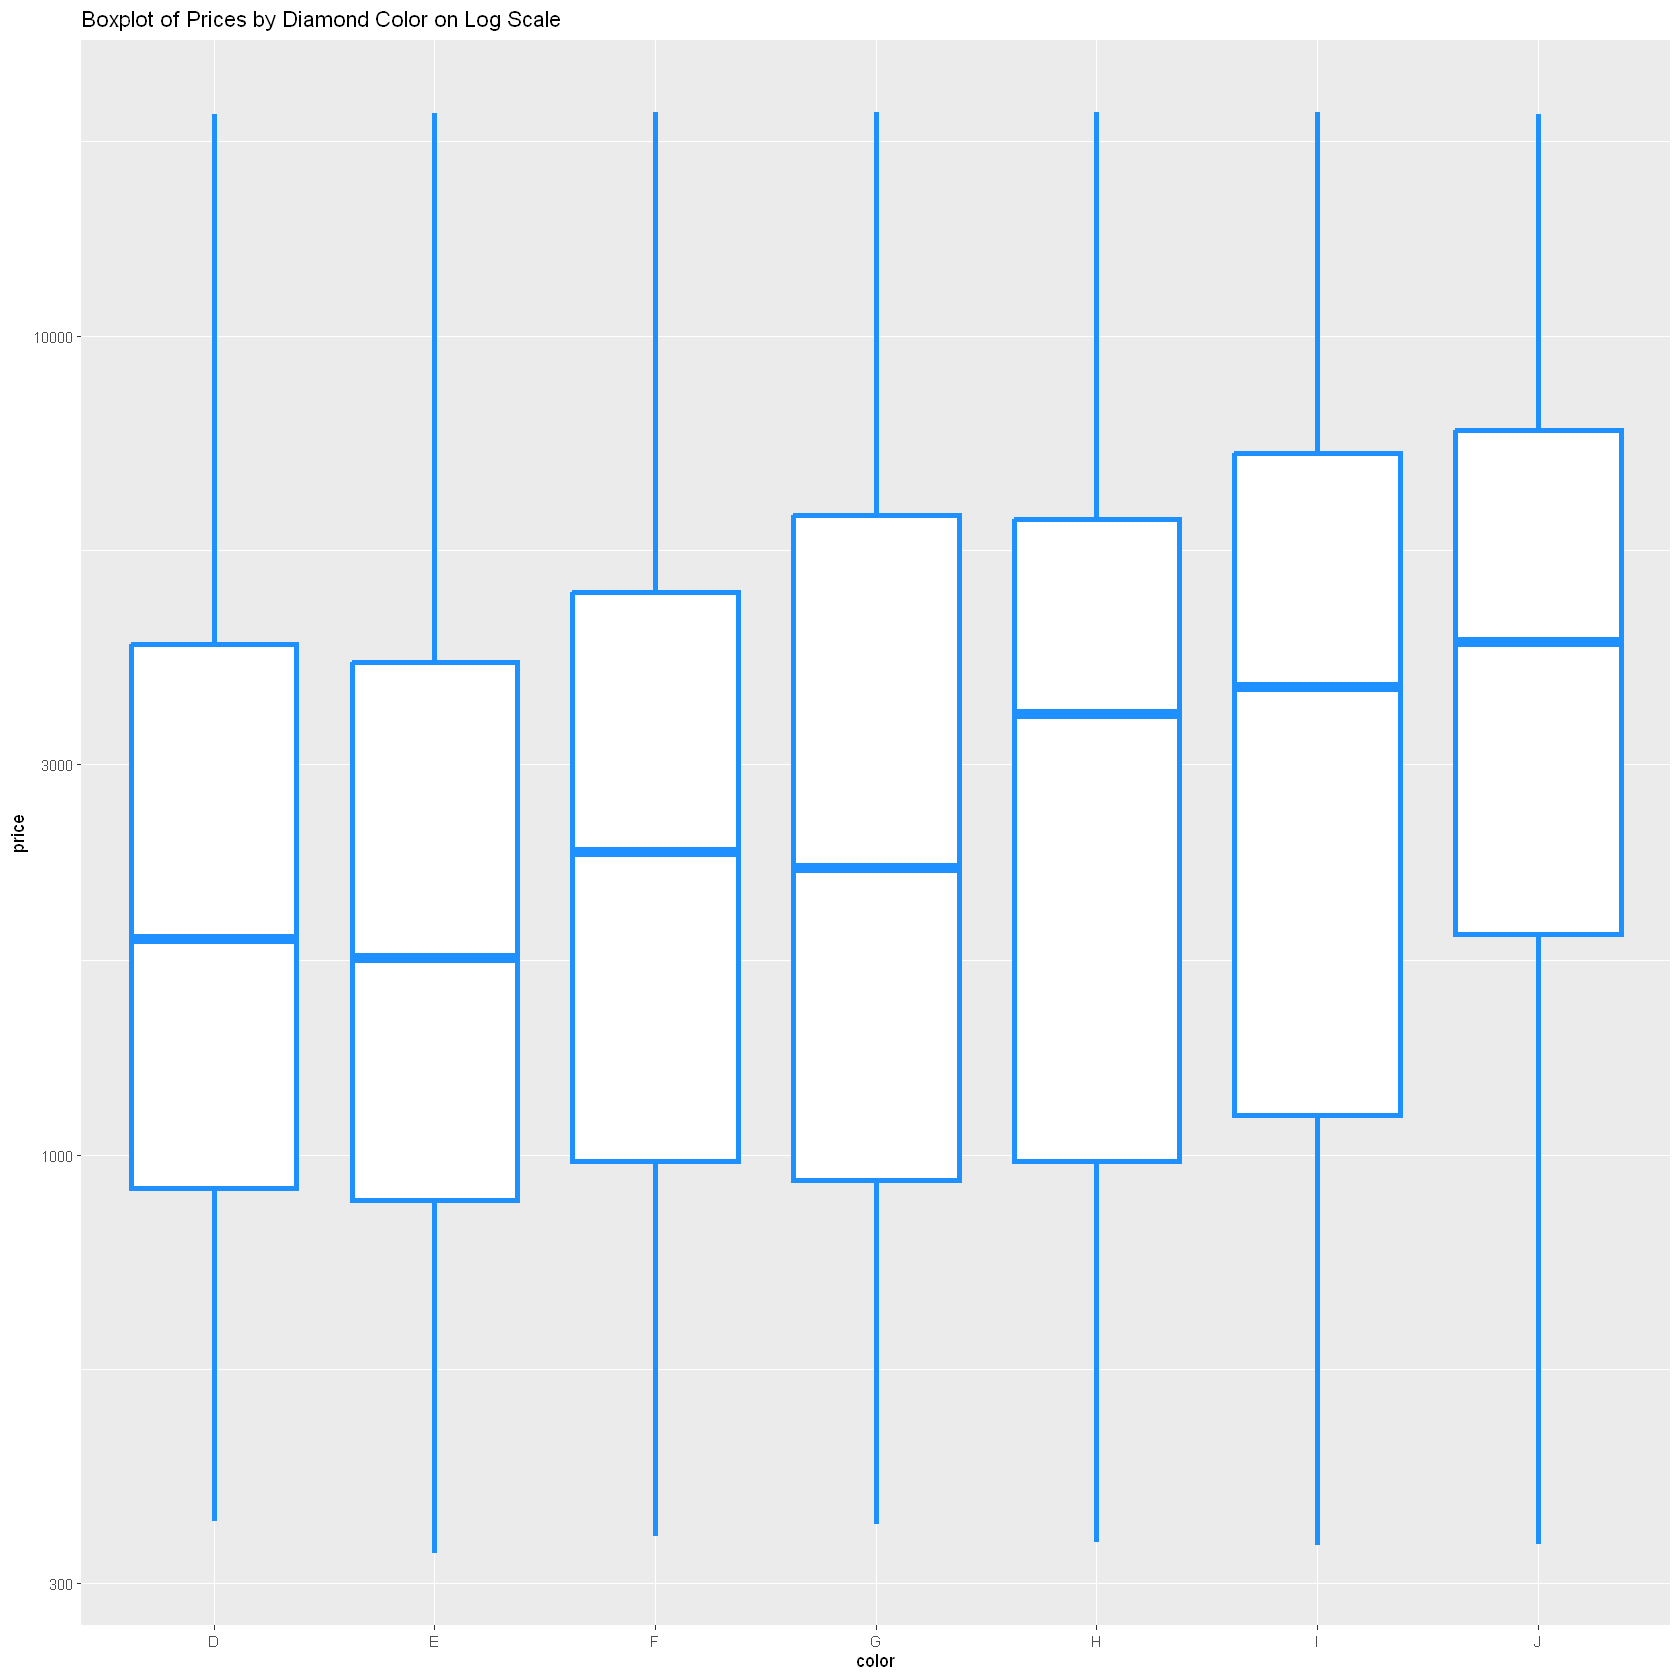

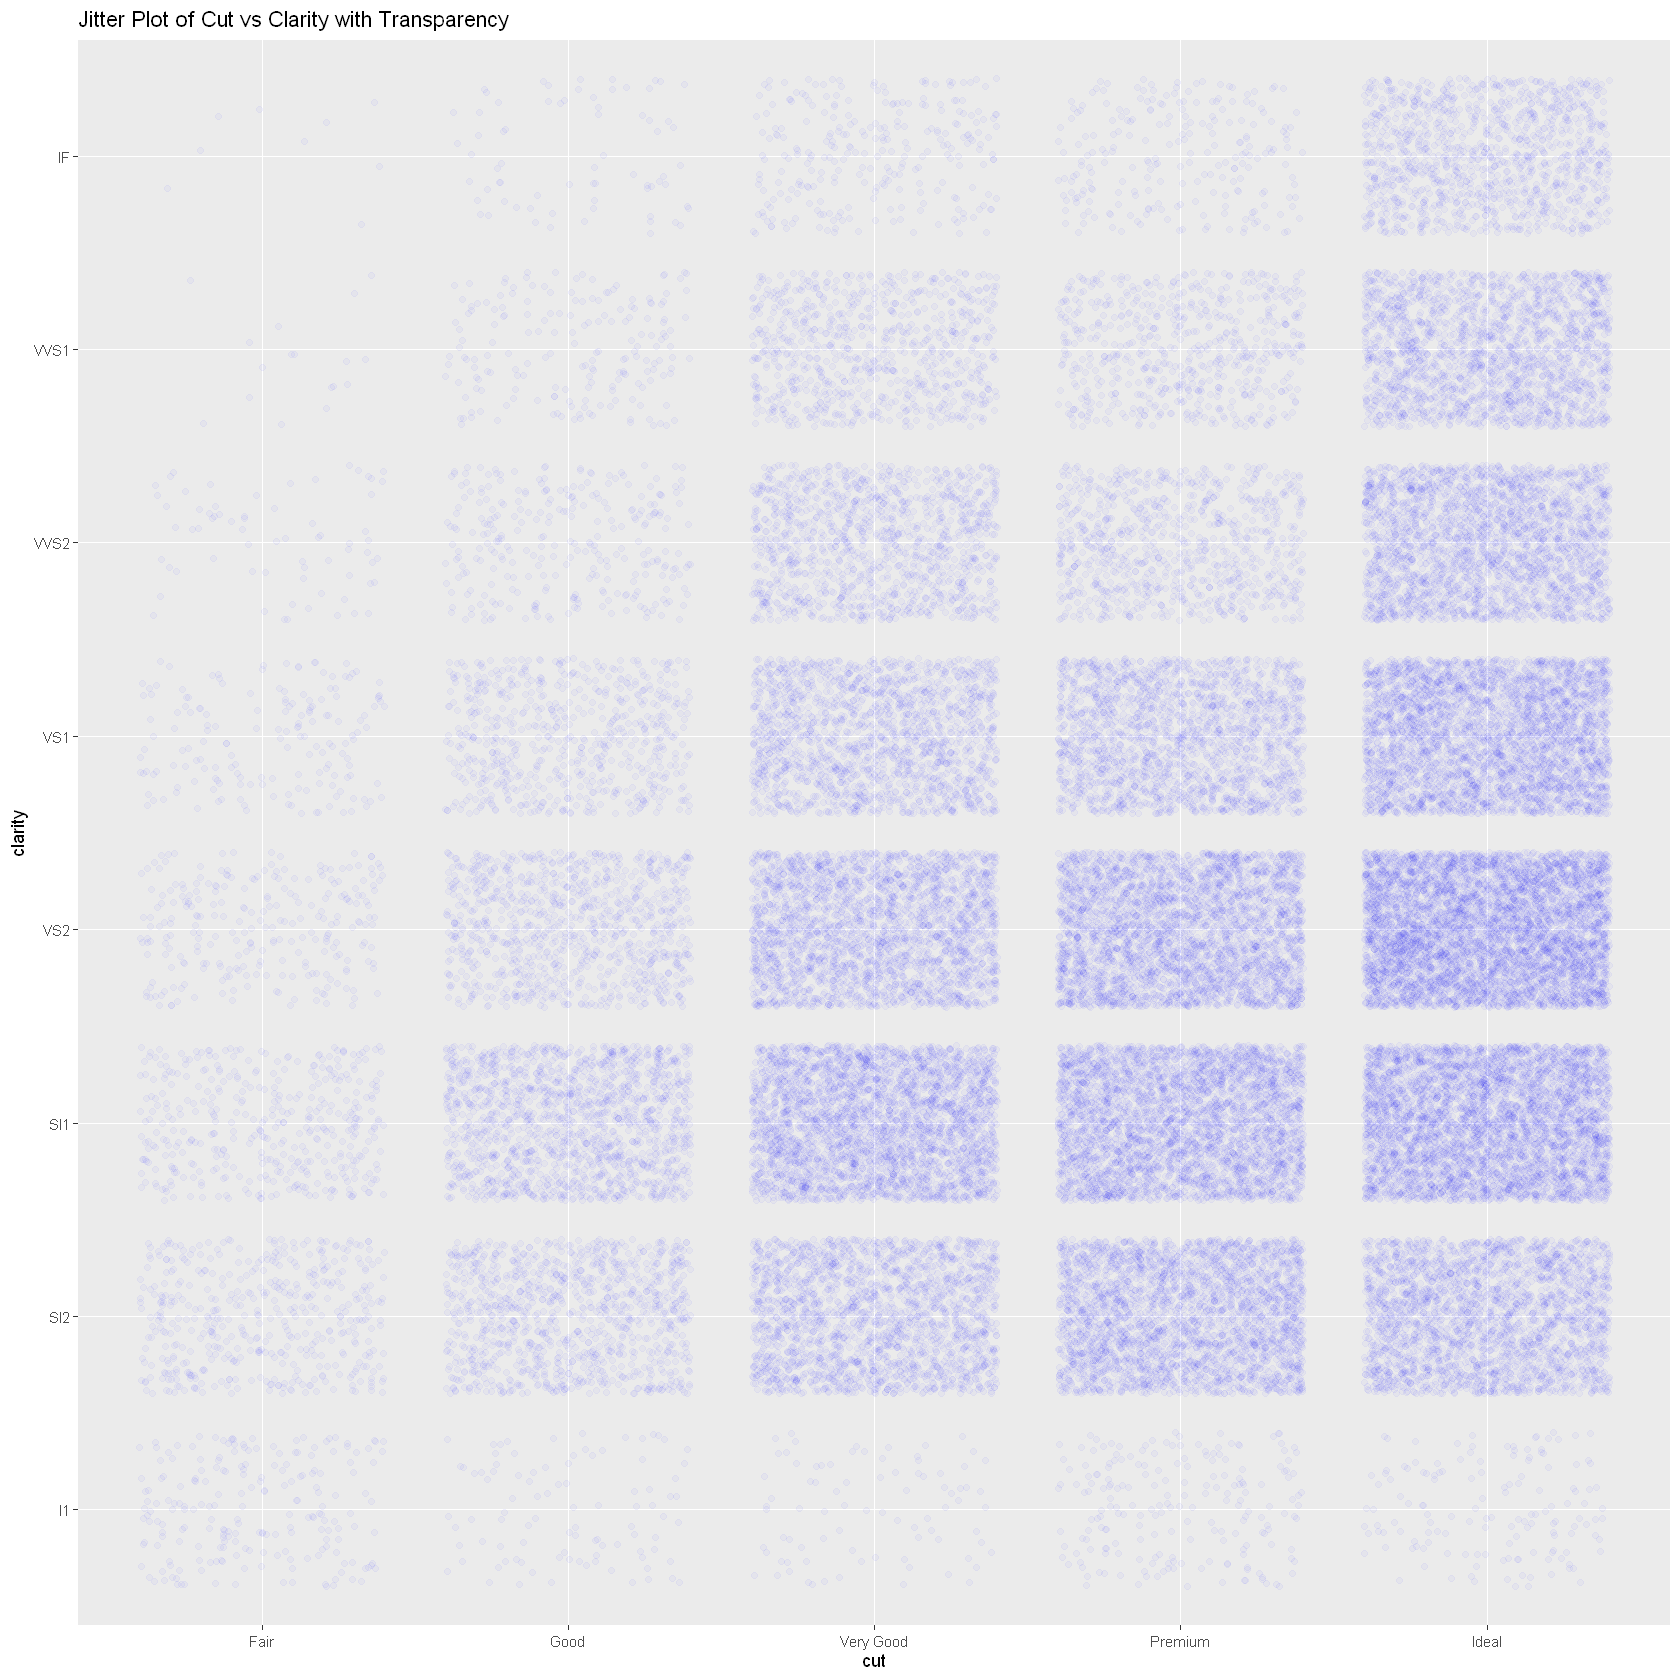

In [4]:
# Zadanie 2
options(repr.plot.width = 14, repr.plot.height = 14) # Ustawienie szerokości okna wykresu

# 1. Wykres z facetami wg clarity i kolorami wg cut
ggplot(diamonds, aes(x = carat, y = price, color = cut)) +
  geom_point() +
  facet_wrap(~clarity) +
  labs(title = "Facet plot of Diamond Prices by Clarity and Cut")

# 2. Wykres rozrzutu z tytułem i opisem osi
ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point(color = 'yellow') +
  ggtitle("Diamonds scatterplot") +
  xlab("Weight carats") +
  ylab("Price")

# 3. Macierzowe histogramy dla atrybutu price, z grupowaniem po clarity
ggplot(diamonds, aes(x = price)) +
  geom_histogram(binwidth = 200) + # Ustawienie szerokości przedziału
  facet_wrap(~clarity) +
  labs(title = "Histograms of Diamond Prices Grouped by Clarity")

# 4. Wykres gęstości z kolorami odpowiadającymi różnym typom cięcia
ggplot(diamonds, aes(x = price, color = cut)) +
  geom_density(size = 1.5) +
  labs(title = "Density Plot of Prices by Cut Type")

# 5. Wykres boxplot z logarytmiczną skalą Y
ggplot(diamonds, aes(x = color, y = price)) +
  geom_boxplot(size = 1.5, color = "#1E90FF") +
  scale_y_log10() +
  labs(title = "Boxplot of Prices by Diamond Color on Log Scale")

# 6. Zapisanie wykresu rozrzutu do plików PNG i JPEG
m_plot <- ggplot(diamonds, aes(x = carat, y = price)) +
  geom_point() +
  labs(title = "Scatter Plot of Carat vs Price")
ggsave(filename = "mp_plot.png", plot = m_plot, width = 10, height = 8)
ggsave(filename = "mp_plot.jpeg", plot = m_plot, width = 10, height = 8)

# 7. Wykres z jitteringiem dla lepszej wizualizacji gęstości punktów
ggplot(diamonds, aes(x = cut, y = clarity)) +
  geom_jitter(alpha = 0.03, color = "blue") +
  labs(title = "Jitter Plot of Cut vs Clarity with Transparency")


## Zadanie 3

1. Wykonaj wykres punktowy dla danych iris. Na osi X umieść `Sepal.Length`, na osi Y `Sepal.Width`, jako kolor - `Species`. Jako atrybuty geometrii ustaw przeźroczystość na 0.5, pozycja `jitter` o parametrze `width=0.2` i kształcie punktów 12.

2. Wykonaj histogram dla atrybutu `Sepal.Length` z iris. Użyj w `aes` dodatkowo wyrażenie `..density..`. Szerokość przedziałów histogramów ustaw na 1, kolor histogramu: ciemno niebieski.

3. Wykonaj histogram dla atrybutu `Sepal.Width`, z `fill=Species`. Ustaw szerokość przedziału histogramu na 0.5, pozycję na `identity` i przeźroczystość na 0.2. Jakie efekty uzyskamy zmieniając pozycję na `fill`?


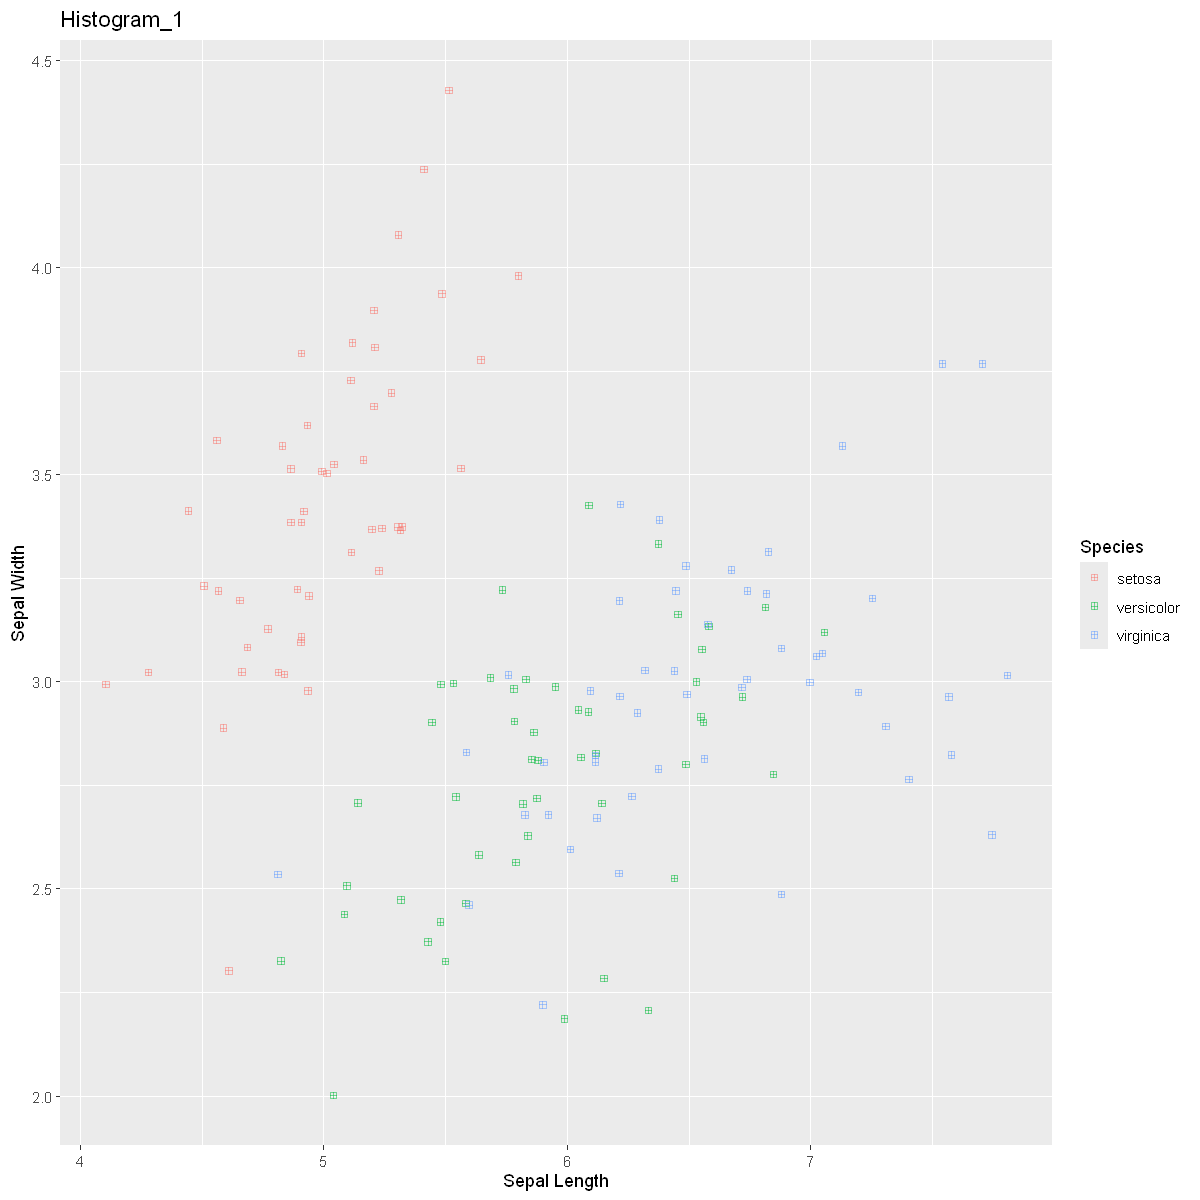

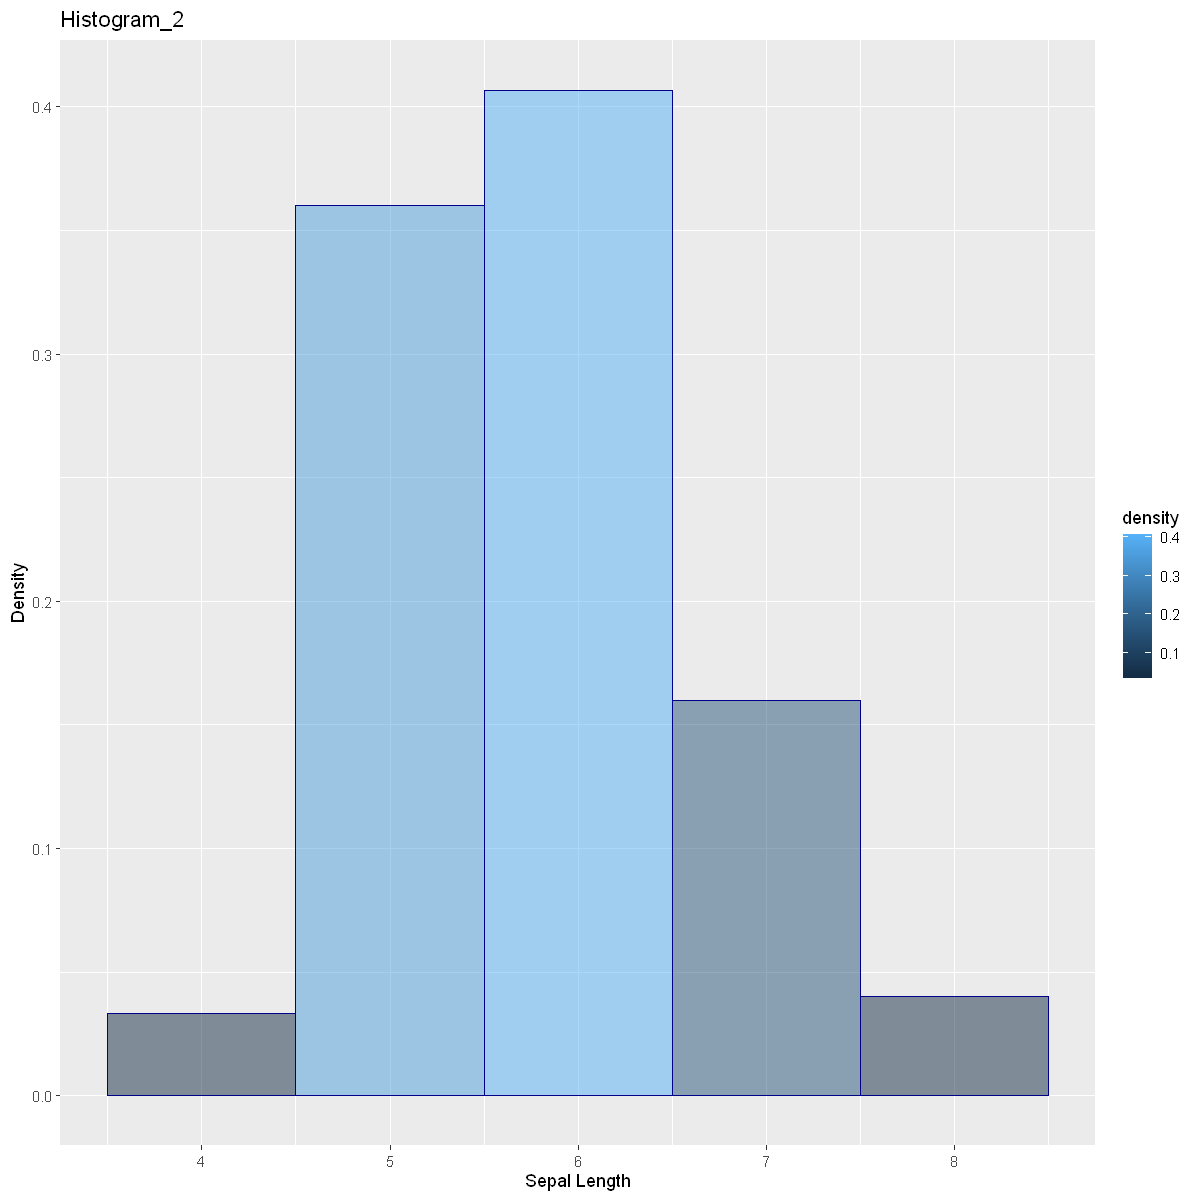

Pytanie dodatkowe: Jakie efekty uzyskamy zmieniając pozycję na `fill`?
ODPOWIEDŹ: Zmiana pozycji na 'fill' w `geom_histogram` spowoduje, że słupki będą się 'nakładać', tworząc znormalizowany stos dla każdej grupy według `Species`.

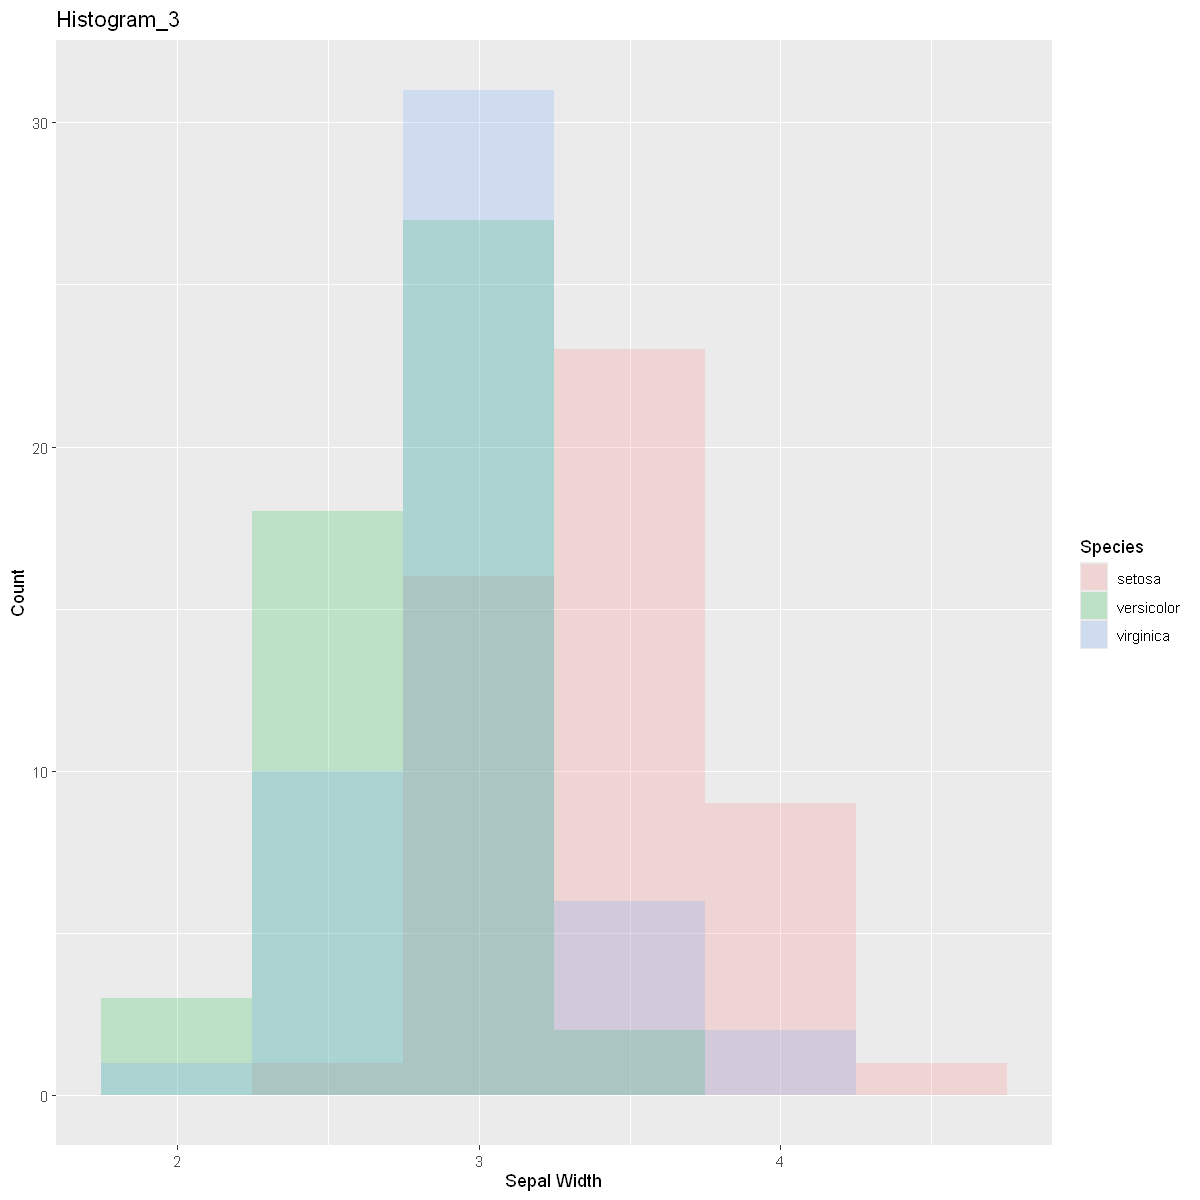

In [5]:
options(repr.plot.width = 10, repr.plot.height = 10) # Ustawienie szerokości i wysokości okna wykresu

# 1. Wykres punktowy dla danych iris z jitterem
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
  geom_point(position = position_jitter(width = 0.2), alpha = 0.5, shape = 12) +   # Dodanie jitter dla lepszej widoczności punktów
  labs(x = "Sepal Length", y = "Sepal Width", title = "Histogram_1")  # Etykiety osi i tytuł wykresu

# 2. Histogram dla atrybutu Sepal.Length z zastosowaniem gęstości
ggplot(iris, aes(x = Sepal.Length, y = after_stat(density), fill = after_stat(density))) +
  geom_histogram(binwidth = 1, color = "darkblue", alpha = 0.5) +    # Ustawienie szerokości przedziału na 1 i koloru na ciemnoniebieski
  labs(x = "Sepal Length", y = "Density", title = "Histogram_2")   # Etykiety osi i tytuł wykresu

# 3. Histogram dla atrybutu Sepal.Width z kolorowaniem według Species
ggplot(iris, aes(x = Sepal.Width, fill = Species)) +
  geom_histogram(binwidth = 0.5, position = "identity", alpha = 0.2) +   # Ustawienie szerokości przedziału na 0.5 i przezroczystości na 0.2
  labs(x = "Sepal Width", y = "Count", title = "Histogram_3")  # Etykiety osi i tytuł wykresu

cat("Pytanie dodatkowe: Jakie efekty uzyskamy zmieniając pozycję na `fill`?")
cat("\nODPOWIEDŹ: Zmiana pozycji na 'fill' w `geom_histogram` spowoduje, że słupki będą się 'nakładać', tworząc znormalizowany stos dla każdej grupy według `Species`.")
